In [95]:
import numpy as np
from sklearn import datasets
from vat.vat import compute_dissimilarity_matrix, vat_ordering
import matplotlib.pyplot as plt

In [96]:
# Load a simple dataset
iris = datasets.load_iris()
X = iris.data

## Compute and Visualize the original dissimilarity matrix

In [97]:
# Compute the dissimilarity matrix
R = compute_dissimilarity_matrix(X)
print(f"Dissimilarity matrix shape: {R.shape}")

Dissimilarity matrix shape: (150, 150)


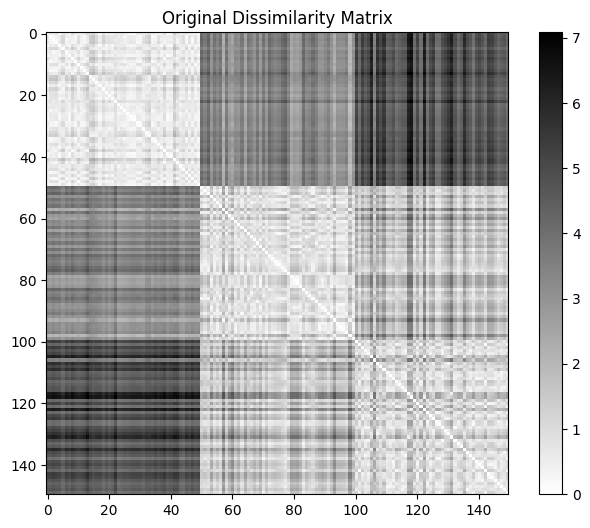

In [98]:
# Visualize the original dissimilarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(R, cmap='gray_r', interpolation='nearest')
plt.title("Original Dissimilarity Matrix")
plt.colorbar()
plt.show()

## Apply the VAT algorithm and Visualize the VAT ordered dissimilarity matrix

In [99]:
P, R_ordered = vat_ordering(R)
print(f"Number of data points: {len(P)}")
print(f"First few points in the ordering: {P[:10]}")

Number of data points: 150
First few points in the ordering: [13 38  8 42 47  3  2 29 30 34]


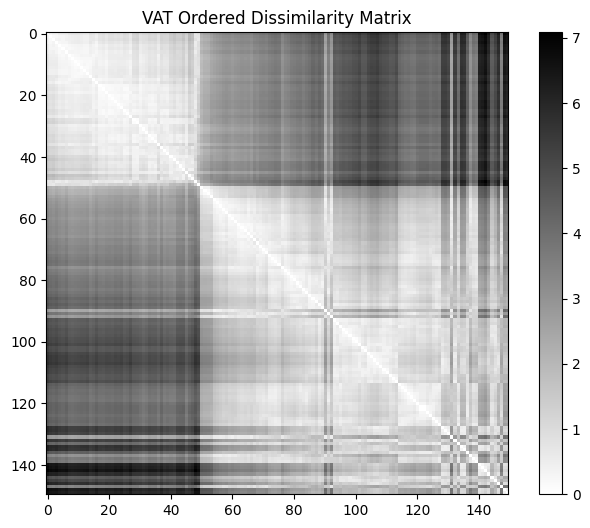

In [100]:
# Visualize the VAT ordered dissimilarity matrix
plt.figure(figsize=(8, 6))
plt.imshow(R_ordered, cmap='gray_r', interpolation='nearest')
plt.title("VAT Ordered Dissimilarity Matrix")
plt.colorbar()
plt.show()

## Display both matrices side-by-side for comparison

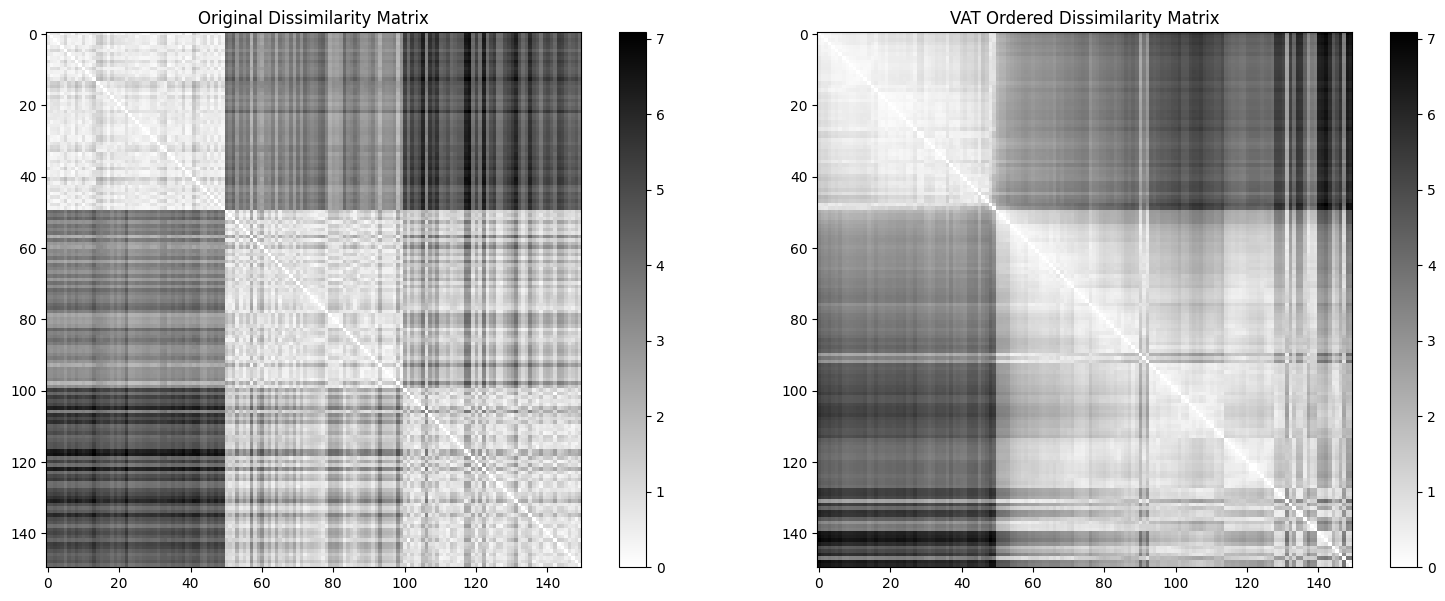

<Figure size 640x480 with 0 Axes>

In [101]:

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.imshow(R, cmap='gray_r', interpolation='nearest')
plt.title("Original Dissimilarity Matrix")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(R_ordered, cmap='gray_r', interpolation='nearest')
plt.title("VAT Ordered Dissimilarity Matrix")
plt.colorbar()

plt.tight_layout()
plt.show()
plt.savefig('vat.png')

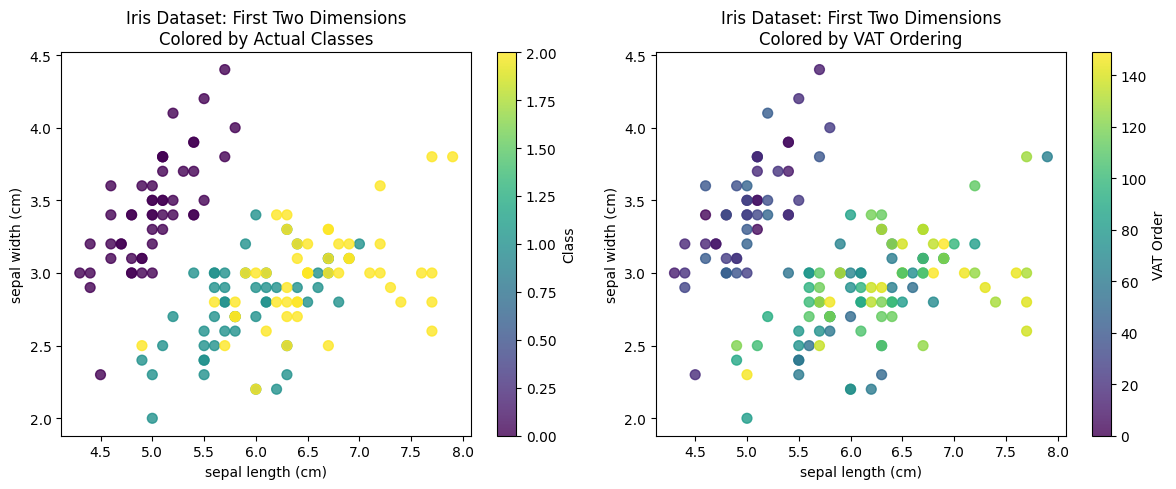

In [102]:
# Additionally, we can visualize the first two dimensions of the dataset
# colored by the known class labels to see if VAT ordering aligns with actual clusters
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=iris.target, cmap='viridis', s=50, alpha=0.8)
plt.title("Iris Dataset: First Two Dimensions\nColored by Actual Classes")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='Class')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=P, cmap='viridis', s=50, alpha=0.8)
plt.title("Iris Dataset: First Two Dimensions\nColored by VAT Ordering")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.colorbar(label='VAT Order')

plt.tight_layout()
plt.show()